In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import glob
import json
import os
from pathlib import Path
import pickle
import re
import shutil

from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from keras.preprocessing.image import (ImageDataGenerator, array_to_img,
                                       img_to_array, load_img)
from keras.utils import plot_model
import pandas as pd
from scipy.spatial.distance import cdist, pdist
from skimage.transform import resize
from sklearn.neighbors import BallTree
import seaborn as sns
import somoclu
import spacy
import tensorflow as tf
from tqdm import tqdm_notebook as tqdmn, tqdm_pandas as tqdmpd

from AlexNet import AlexNet, preprocess_image_batch
from multimodal_som import *

sns.set(style='ticks', context='poster')
pd.set_option('display.max_rows', 12)

Populating the interactive namespace from numpy and matplotlib


/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/mtambos/anaconda/envs/thesis/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
nlp = spacy.load('en')

In [4]:
alexnet, cnn_model = create_cnn_model()

ResourceExhaustedError: OOM when allocating tensor with shape[9216,4096]
	 [[Node: dense_1/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=632160, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/random_uniform/shape)]]

Caused by op 'dense_1/random_uniform/RandomUniform', defined at:
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-792ebafda519>", line 1, in <module>
    alexnet, cnn_model = create_cnn_model()
  File "/home/mtambos/google_drive/Projects/masters_thesis/code/experiment_imagenet/multimodal_som.py", line 254, in create_cnn_model
    alexnet = AlexNet(weights='../alexnet_weights.h5')
  File "/home/mtambos/google_drive/Projects/masters_thesis/code/experiment_imagenet/AlexNet.py", line 160, in AlexNet
    dense_1 = Dense(4096, activation='relu', name='dense_1')(dense_1)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/keras/engine/topology.py", line 576, in __call__
    self.build(input_shapes[0])
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/keras/layers/core.py", line 830, in build
    constraint=self.kernel_constraint)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/keras/engine/topology.py", line 397, in add_weight
    weight = K.variable(initializer(shape),
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/keras/initializers.py", line 212, in __call__
    dtype=dtype, seed=self.seed)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3637, in random_uniform
    dtype=dtype, seed=seed)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 240, in random_uniform
    shape, dtype, seed=seed1, seed2=seed2)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 473, in _random_uniform
    name=name)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[9216,4096]
	 [[Node: dense_1/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=632160, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/random_uniform/shape)]]


In [4]:
alexnet = AlexNet(weights='../alexnet_weights.h5')

In [3]:
model = MultimodalSOM()
model.load('som_planar_rectangular')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4396)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4396)              17584     
_________________________________________________________________
dense_1 (Dense)              (None, 4396)              19329212  
_________________________________________________________________
batch_normalization_2 (Batch (None, 4396)              17584     
_________________________________________________________________
dropout_3 (Dropout)          (None, 4396)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4397000   
Total params: 23,761,380
Trainable params: 23,743,796
Non-trainable params: 17,584
___________________________________________________________

/home/mtambos/anaconda/envs/thesis/lib/python3.6/site-packages/keras/models.py:288: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [6]:
val_dir = Path('/data/master_thesis/ILSVRC2012_img_val')
val_imgs = sorted(set(val_dir.glob('*.JPEG')))
val_imgs[:5]

[PosixPath('/data/master_thesis/ILSVRC2012_img_val/ILSVRC2012_val_00000001.JPEG'),
 PosixPath('/data/master_thesis/ILSVRC2012_img_val/ILSVRC2012_val_00000002.JPEG'),
 PosixPath('/data/master_thesis/ILSVRC2012_img_val/ILSVRC2012_val_00000003.JPEG'),
 PosixPath('/data/master_thesis/ILSVRC2012_img_val/ILSVRC2012_val_00000004.JPEG'),
 PosixPath('/data/master_thesis/ILSVRC2012_img_val/ILSVRC2012_val_00000005.JPEG')]

In [7]:
with open('/data/master_thesis/experiment8/wnid2idx.json') as fp:
    wnid2idx = json.load(fp)
idx2wnid = {v: k for k, v in wnid2idx.items()}
idx2wnid

{0: 'n01440764',
 1: 'n01443537',
 2: 'n01484850',
 3: 'n01491361',
 4: 'n01494475',
 5: 'n01496331',
 6: 'n01498041',
 7: 'n01514668',
 8: 'n01514859',
 9: 'n01518878',
 10: 'n01530575',
 11: 'n01531178',
 12: 'n01532829',
 13: 'n01534433',
 14: 'n01537544',
 15: 'n01558993',
 16: 'n01560419',
 17: 'n01580077',
 18: 'n01582220',
 19: 'n01592084',
 20: 'n01601694',
 21: 'n01608432',
 22: 'n01614925',
 23: 'n01616318',
 24: 'n01622779',
 25: 'n01629819',
 26: 'n01630670',
 27: 'n01631663',
 28: 'n01632458',
 29: 'n01632777',
 30: 'n01641577',
 31: 'n01644373',
 32: 'n01644900',
 33: 'n01664065',
 34: 'n01665541',
 35: 'n01667114',
 36: 'n01667778',
 37: 'n01669191',
 38: 'n01675722',
 39: 'n01677366',
 40: 'n01682714',
 41: 'n01685808',
 42: 'n01687978',
 43: 'n01688243',
 44: 'n01689811',
 45: 'n01692333',
 46: 'n01693334',
 47: 'n01694178',
 48: 'n01695060',
 49: 'n01697457',
 50: 'n01698640',
 51: 'n01704323',
 52: 'n01728572',
 53: 'n01728920',
 54: 'n01729322',
 55: 'n01729977',
 5

In [8]:
wnids = pd.read_table('/data/master_thesis/wnid2words.txt',
                      names=['wnid', 'word'])
wnids

,wnid,word
0,n00001740,entity
1,n00001930,physical entity
2,n00002137,"abstraction, abstract entity"
3,n00002452,thing
4,n00002684,"object, physical object"
5,n00003553,"whole, unit"
...,...,...
82109,n15299097,snap
82110,n15299225,study hall
82111,n15299367,"Transfiguration, Transfiguration Day, August 6"


In [9]:
idx2word = np.array([wnids.loc[wnids.wnid == idx2wnid[k], 'word'].iloc[0].split(',')[0]
                     for k in range(1000)])
display(idx2word.shape)
idx2word

(1000,)

array(['tench', 'goldfish', 'great white shark', 'tiger shark',
       'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich',
       'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting',
       'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel',
       'kite', 'bald eagle', 'vulture', 'great grey owl',
       'European fire salamander', 'common newt', 'eft',
       'spotted salamander', 'axolotl', 'bullfrog', 'tree frog',
       'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle',
       'terrapin', 'box turtle', 'banded gecko', 'common iguana',
       'American chameleon', 'whiptail', 'agama', 'frilled lizard',
       'alligator lizard', 'Gila monster', 'green lizard',
       'African chameleon', 'Komodo dragon', 'African crocodile',
       'American alligator', 'triceratops', 'thunder snake',
       'ringneck snake', 'hognose snake', 'green snake', 'king snake',
       'garter snake', 'water snake', 'vine snake', 'night snake',
     

In [10]:
from sklearn.manifold import TSNE

projection = TSNE().fit_transform(model.som_model.codebook.reshape(1024, 4396))

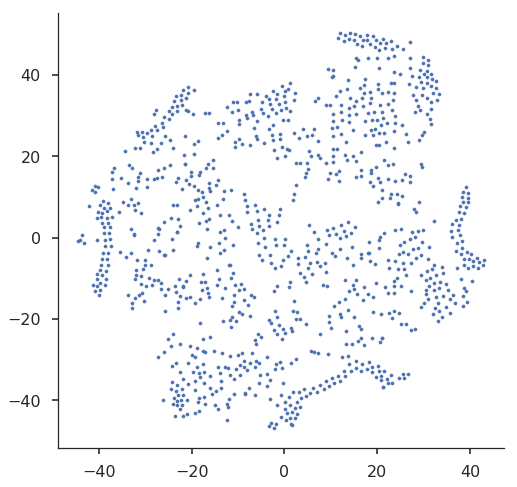

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(*projection.T, s=10)
sns.despine()

In [12]:
val_labelids = pd.read_csv('/data/master_thesis/ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt',
                           names=['label_id']).label_id
val_labelids

0        490
1        361
2        171
3        822
4        297
5        482
        ... 
49994    984
49995     10
49996    495
49997    128
49998    848
49999    186
Name: label_id, Length: 50000, dtype: int64

# All neurons

In [13]:
y_alex_pred = []
y_msom_all_pred = []
y_true = []
project_images.cnn_model = model.cnn_model
for i, img_path in enumerate(tqdmn(val_imgs)):
    img = preprocess_image_batch([img_path], img_size=(256, 256),
                                 crop_size=(227, 227),
                                 color_mode="rgb")
    y_alex_pred.append(alexnet.predict(img))

    target = project_images(img)[0]
    target = np.r_['0,1', target, np.zeros(WORD_OUT_SHAPE)]
    bmu = model.get_bmu(target, k=1, metric='sqeuclidean')[0]
    bmu = model.som_model.codebook[bmu]
    target[-WORD_OUT_SHAPE:] = bmu[-WORD_OUT_SHAPE:]
    y_msom_all_pred.append(model.top_model.predict(np.atleast_2d(target)))
    
    y_true.append(val_labelids[i])

y_msom_all_pred = np.array(y_msom_all_pred).reshape(len(y_msom_all_pred), 1000)
y_alex_pred = np.array(y_alex_pred).reshape(len(y_alex_pred), 1000)
y_true = np.array(y_true)

A Jupyter Widget

In [34]:
import pickle

with open('all_neurons_results.json', 'wb') as fp:
    pickle.dump({'y_alex_pred': y_alex_pred,
                 'y_msom_pred': y_msom_all_pred,
                 'y_true': y_true},
                fp)

In [14]:
import pickle

with open('all_neurons_results.json', 'rb') as fp:
    ys = pickle.load(fp)
y_alex_pred = ys['y_alex_pred']
y_msom_all_pred = ys['y_msom_pred']
y_true = ys['y_true']

In [15]:
y_true_1h = np.zeros((len(y_true), 1000))
for i, row in enumerate(y_true_1h):
    row[y_true[i]-1] = 1

In [10]:
from scipy.io import loadmat
val_meta = loadmat('/data/master_thesis/ILSVRC2012_devkit_t12/data/meta.mat')['synsets']
columns = ['ILSVRC2012_ID', 'WNID', 'words']
val_meta = pd.DataFrame([[v[c][0].flatten()[0] for c in columns] for v in val_meta],
                        columns=columns)
val_meta = val_meta.set_index('ILSVRC2012_ID')

In [11]:
y_true_wnid = val_meta.loc[y_true]
y_true_wnid

,WNID,words
ILSVRC2012_ID,,
490,n01751748,sea snake
361,n09193705,alp
171,n02105855,"Shetland sheepdog, Shetland sheep dog, Shetland"
822,n04263257,soup bowl
297,n03125729,cradle
482,n01735189,"garter snake, grass snake"
...,...,...
984,n03729826,matchstick
10,n02123394,Persian cat


In [18]:
y_alex_pred_t1_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_alex_pred, top=1)]
y_msom_all_pred_t1_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_all_pred, top=1)]

In [20]:
y_alex_pred_t2_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_alex_pred, top=2)]
y_msom_all_pred_t2_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_all_pred, top=2)]

In [21]:
y_alex_pred_t5_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_alex_pred, top=5)]
y_msom_all_pred_t5_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_all_pred, top=5)]

In [22]:
y_alex_pred_t10_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_alex_pred, top=10)]
y_msom_all_pred_t10_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_all_pred, top=10)]

In [25]:
alex_t1_score = 0
alex_t2_score = 0
alex_t5_score = 0
alex_t10_score = 0
for i, (idx, row) in enumerate(tqdmn(y_true_wnid.iterrows(),
                                     total=len(y_true_wnid))):
    if row.WNID in y_alex_pred_t1_wnid[i]:
        alex_t1_score += 1
    if row.WNID in y_alex_pred_t2_wnid[i]:
        alex_t2_score += 1
    if row.WNID in y_alex_pred_t5_wnid[i]:
        alex_t5_score += 1
    if row.WNID in y_alex_pred_t10_wnid[i]:
        alex_t10_score += 1

alex_t1_score /= len(y_alex_pred_t1_wnid)
alex_t2_score /= len(y_alex_pred_t2_wnid)
alex_t5_score /= len(y_alex_pred_t5_wnid)
alex_t10_score /= len(y_alex_pred_t10_wnid)
alex_t1_score, alex_t2_score, alex_t5_score, alex_t10_score

A Jupyter Widget

(0.55652, 0.67552, 0.79056, 0.85628)

In [26]:
msom_t1_score = 0
msom_t2_score = 0
msom_t5_score = 0
msom_t10_score = 0
for i, (idx, row) in enumerate(tqdmn(y_true_wnid.iterrows(),
                                     total=len(y_true_wnid))):
    if row.WNID in y_msom_all_pred_t1_wnid[i]:
        msom_t1_score += 1
    if row.WNID in y_msom_all_pred_t2_wnid[i]:
        msom_t2_score += 1
    if row.WNID in y_msom_all_pred_t5_wnid[i]:
        msom_t5_score += 1
    if row.WNID in y_msom_all_pred_t10_wnid[i]:
        msom_t10_score += 1
msom_t1_score /= len(y_msom_all_pred_t1_wnid)
msom_t2_score /= len(y_msom_all_pred_t2_wnid)
msom_t5_score /= len(y_msom_all_pred_t5_wnid)
msom_t10_score /= len(y_msom_all_pred_t10_wnid)
msom_t1_score, msom_t2_score, msom_t5_score, msom_t10_score

A Jupyter Widget

(0.50578, 0.62494, 0.75082, 0.82332)

# Disable W2V neurons

In [35]:
y_msom_cnn_pred = []
project_images.cnn_model = model.cnn_model
for i, img_path in enumerate(tqdmn(val_imgs)):
    img = preprocess_image_batch([img_path], img_size=(256, 256),
                                 crop_size=(227, 227),
                                 color_mode="rgb")
    target = project_images(img)[0]
    target = np.r_['0,1', target, np.zeros(WORD_OUT_SHAPE)]
    y_msom_cnn_pred.append(model.top_model.predict(np.atleast_2d(target)))
    
y_msom_cnn_pred = np.array(y_msom_cnn_pred).reshape(len(y_msom_cnn_pred), 1000)

A Jupyter Widget

In [36]:
import pickle

with open('no_w2v_results.json', 'wb') as fp:
    pickle.dump({'y_alex_pred': y_alex_pred,
                 'y_msom_pred': y_msom_cnn_pred,
                 'y_true': y_true},
                fp)

In [6]:
import pickle

with open('no_w2v_results.json', 'rb') as fp:
    ys = pickle.load(fp)
y_alex_pred = ys['y_alex_pred']
y_msom_cnn_pred = ys['y_msom_pred']
y_true = ys['y_true']

In [7]:
y_msom_cnn_pred_t1_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_cnn_pred, top=1)]
y_msom_cnn_pred_t2_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_cnn_pred, top=2)]
y_msom_cnn_pred_t5_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_cnn_pred, top=5)]
y_msom_cnn_pred_t10_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_cnn_pred, top=10)]

In [12]:
msom_t1_score = 0
msom_t2_score = 0
msom_t5_score = 0
msom_t10_score = 0
for i, (idx, row) in enumerate(tqdmn(y_true_wnid.iterrows(),
                                     total=len(y_true_wnid))):
    if row.WNID in y_msom_cnn_pred_t1_wnid[i]:
        msom_t1_score += 1
    if row.WNID in y_msom_cnn_pred_t2_wnid[i]:
        msom_t2_score += 1
    if row.WNID in y_msom_cnn_pred_t5_wnid[i]:
        msom_t5_score += 1
    if row.WNID in y_msom_cnn_pred_t10_wnid[i]:
        msom_t10_score += 1

msom_t1_score /= len(y_msom_cnn_pred_t1_wnid)
msom_t2_score /= len(y_msom_cnn_pred_t2_wnid)
msom_t5_score /= len(y_msom_cnn_pred_t5_wnid)
msom_t10_score /= len(y_msom_cnn_pred_t10_wnid)

msom_t1_score, msom_t2_score, msom_t5_score, msom_t10_score

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))

(0.5057, 0.62472, 0.75054, 0.82336)

# Disable CNN neurons

In [40]:
y_msom_w2v_pred = []
project_images.cnn_model = model.cnn_model
for i, img_path in enumerate(tqdmn(val_imgs)):
    img = preprocess_image_batch([img_path], img_size=(256, 256),
                                 crop_size=(227, 227),
                                 color_mode="rgb")
    target = project_images(img)[0]
    target = np.r_['0,1', target, np.zeros(WORD_OUT_SHAPE)]
    bmu = model.get_bmu(target, k=1, metric='sqeuclidean')[0]
    bmu = model.som_model.codebook[bmu]
    target[-WORD_OUT_SHAPE:] = bmu[-WORD_OUT_SHAPE:]
    target[:IMG_OUT_SHAPE] = np.zeros(IMG_OUT_SHAPE)
    y_msom_w2v_pred.append(model.top_model.predict(np.atleast_2d(target)))
    
y_msom_w2v_pred = np.array(y_msom_w2v_pred).reshape(len(y_msom_w2v_pred), 1000)

A Jupyter Widget

In [41]:
import pickle

with open('no_cnn_results.json', 'wb') as fp:
    pickle.dump({'y_alex_pred': y_alex_pred,
                 'y_msom_pred': y_msom_w2v_pred,
                 'y_true': y_true},
                fp)

In [13]:
import pickle

with open('no_cnn_results.json', 'rb') as fp:
    ys = pickle.load(fp)
y_alex_pred = ys['y_alex_pred']
y_msom_w2v_pred = ys['y_msom_pred']
y_true = ys['y_true']

In [14]:
y_msom_w2v_pred_t1_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_w2v_pred, top=1)]
y_msom_w2v_pred_t2_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_w2v_pred, top=2)]
y_msom_w2v_pred_t5_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_w2v_pred, top=5)]
y_msom_w2v_pred_t10_wnid = [list(zip(*pred))[0] for pred in decode_predictions(y_msom_w2v_pred, top=10)]

In [15]:
msom_t1_score = 0
msom_t2_score = 0
msom_t5_score = 0
msom_t10_score = 0
for i, (idx, row) in enumerate(tqdmn(y_true_wnid.iterrows(),
                                     total=len(y_true_wnid))):
    if row.WNID in y_msom_w2v_pred_t1_wnid[i]:
        msom_t1_score += 1
    if row.WNID in y_msom_w2v_pred_t2_wnid[i]:
        msom_t2_score += 1
    if row.WNID in y_msom_w2v_pred_t5_wnid[i]:
        msom_t5_score += 1
    if row.WNID in y_msom_w2v_pred_t10_wnid[i]:
        msom_t10_score += 1

msom_t1_score /= len(y_msom_w2v_pred_t1_wnid)
msom_t2_score /= len(y_msom_w2v_pred_t2_wnid)
msom_t5_score /= len(y_msom_w2v_pred_t5_wnid)
msom_t10_score /= len(y_msom_w2v_pred_t10_wnid)
msom_t1_score, msom_t2_score, msom_t5_score, msom_t10_score

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))

(0.001, 0.002, 0.00576, 0.0111)

# Zeroed weights

In [4]:
hidden_weights, hidden_bias = model.top_model.get_layer('dense_3').get_weights()
hidden_weights

array([[-1.9108395e-06,  4.3373848e-06, -1.2325701e-06, ...,
         1.1141666e-06,  6.1031250e-07, -3.2433286e-07],
       [ 3.7048708e-06, -9.2547339e-07,  6.8123313e-07, ...,
         3.5890002e-07,  1.9195465e-06,  1.5571884e-06],
       [-2.6042517e-07,  4.0470550e-06,  4.3079729e-07, ...,
        -2.1578928e-06, -8.2882912e-07, -3.2205942e-06],
       ...,
       [ 3.9152042e-08, -8.5376604e-07,  1.6945341e-07, ...,
         3.3179219e-07,  3.9987879e-07, -9.5652098e-08],
       [ 1.4375063e-06,  2.7270385e-06,  5.5641488e-07, ...,
         4.5995648e-07, -1.4751896e-07, -5.6404690e-07],
       [-4.1402421e-07,  4.4997668e-07,  1.1234683e-06, ...,
        -6.8398680e-07, -1.1151436e-06, -2.3489542e-06]], dtype=float32)

In [5]:
cnn_weights = hidden_weights[:IMG_OUT_SHAPE, :]
w2v_weights = hidden_weights[IMG_OUT_SHAPE:, :]

In [7]:
np.linalg.norm(cnn_weights, axis=1), np.linalg.norm(cnn_weights, axis=1).shape

(array([1.0651693e-04, 8.7314089e-05, 4.0821329e-02, ..., 8.5790380e-05,
        1.0004565e-04, 2.5610631e-02], dtype=float32), (4096,))

In [20]:
zeroed_cnn_weights = cnn_weights[np.linalg.norm(cnn_weights, axis=1) < 1e-3]
print(len(zeroed_cnn_weights), len(zeroed_cnn_weights)/len(cnn_weights))
zeroed_cnn_weights

2056 0.501953125


array([[-1.9108395e-06,  4.3373848e-06, -1.2325701e-06, ...,
         1.1141666e-06,  6.1031250e-07, -3.2433286e-07],
       [ 3.7048708e-06, -9.2547339e-07,  6.8123313e-07, ...,
         3.5890002e-07,  1.9195465e-06,  1.5571884e-06],
       [ 1.2799995e-07,  2.3054270e-08, -3.9121676e-07, ...,
        -2.5940665e-08, -4.0434031e-08,  1.4799147e-07],
       ...,
       [-3.3311613e-07, -5.3303211e-08, -2.2750505e-06, ...,
         1.6784043e-08, -1.1994695e-06,  7.1427849e-08],
       [-4.3161384e-07, -5.3030658e-07,  1.1622124e-06, ...,
         6.1487879e-07, -3.1392352e-07, -1.1385863e-06],
       [-1.7482478e-06,  2.3718785e-06,  1.4927041e-06, ...,
         1.3962905e-06, -7.9094661e-08,  2.0849238e-06]], dtype=float32)

In [19]:
zeroed_w2v_weights = w2v_weights[np.linalg.norm(w2v_weights, axis=1) < 1e-3]
print(len(zeroed_w2v_weights), len(zeroed_w2v_weights)/len(w2v_weights))
zeroed_w2v_weights

297 0.99


array([[ 1.8210790e-06,  1.2020085e-07,  1.4591931e-06, ...,
        -8.5926979e-07, -5.1491861e-07, -3.6685765e-07],
       [ 2.3059256e-06,  4.2534919e-07,  6.5695832e-07, ...,
         1.0447050e-06,  5.7640824e-07, -1.3915344e-06],
       [-2.9264379e-07,  1.7104958e-07,  1.0713256e-06, ...,
        -9.0436492e-07, -1.5184389e-06, -8.3552402e-07],
       ...,
       [ 3.9152042e-08, -8.5376604e-07,  1.6945341e-07, ...,
         3.3179219e-07,  3.9987879e-07, -9.5652098e-08],
       [ 1.4375063e-06,  2.7270385e-06,  5.5641488e-07, ...,
         4.5995648e-07, -1.4751896e-07, -5.6404690e-07],
       [-4.1402421e-07,  4.4997668e-07,  1.1234683e-06, ...,
        -6.8398680e-07, -1.1151436e-06, -2.3489542e-06]], dtype=float32)